In [1]:
import os, platform
uname = os.uname()
print("Hostname: {}, System: {}, Dist: {}".format(uname.nodename, uname.sysname, ' '.join(platform.dist())))

Hostname: x1station, System: Linux, Dist: LinuxMint 19.1 tessa


### Import packages

In [2]:
from phantasy import disable_warnings
disable_warnings()
from phantasy import MachinePortal
from phantasy.tools import plot_orbit

### Load machine/lattice

In [3]:
mp = MachinePortal("FRIB_VA", "LEBT")
lat = mp.work_lattice_conf

### Sync device live settings

In [4]:
lat.sync_settings()
path, fm = lat.run()
# fm.generate_latfile(latfile='test1.lat')

### Show the simulated envelope

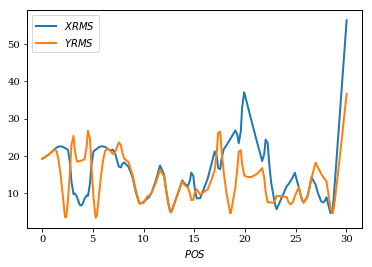

In [5]:
p1 = plot_orbit(('pos', 'xrms'), ('pos', 'yrms'), flame_model=fm)

### Change initial beam condition

1. Read from another FLAME lattice file
```python
from flame_utils import ModelFlame, generate_source
fm1 = ModelFlame(lat_file='some_lat_file')
bs1 = fm1.bmstate
s1 = generate_source(state=bs1)
```
2. Manually prepare beam condition, i.e. source configuration, see below

In [6]:
from numpy import array
s1 = {'index': 0,
 'properties': {'IonChargeStates': array([ 0.13865546]),
  'IonEk': 11969.995341581,
  'IonEs': 931494320.0,
  'NCharge': array([ 10111.]),
  'P0': array([  1.08055458e-14,  -3.81040863e-18,   1.33339836e-14,
          -5.69478990e-18,  -1.49954832e-15,   0.00000000e+00,
           1.00000000e+00]),
  'S0': array([  6.81917302e+02,  -2.52846423e-01,   3.83669247e+01,
          -1.26756931e-02,   2.80851875e-01,  -1.06898705e-16,
           0.00000000e+00,  -2.52846423e-01,   9.44804331e-05,
          -6.25559687e-03,   1.77946925e-06,  -9.79349148e-05,
           4.48060691e-20,   0.00000000e+00,   3.83669247e+01,
          -6.25559687e-03,   8.92535761e+02,  -3.39508360e-01,
           8.36844956e-02,   0.00000000e+00,   0.00000000e+00,
          -1.26756931e-02,   1.77946925e-06,  -3.39508360e-01,
           1.29900589e-04,  -3.00943030e-05,   0.00000000e+00,
           0.00000000e+00,   2.80851875e-01,  -9.79349148e-05,
           8.36844956e-02,  -3.00943030e-05,   1.68488662e-04,
           9.87582187e-15,   0.00000000e+00,  -1.06898705e-16,
           4.48060691e-20,   0.00000000e+00,   0.00000000e+00,
           9.87582187e-15,   1.00000000e-19,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00]),
  'matrix_variable': 'S',
  'name': 'S',
  'type': 'source',
  'vector_variable': 'P'}}

#### Update beam initial condition

In [7]:
fm.configure(econf=s1)

### Show the updated envelope

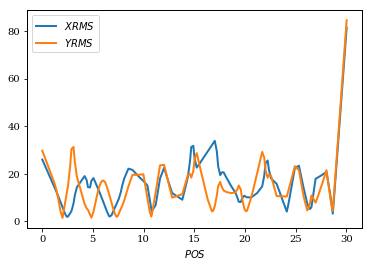

In [8]:
p2 = plot_orbit(('pos', 'xrms'), ('pos', 'yrms'), flame_model=fm)